In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.figsize": (16, 9)})
sns.set(style="whitegrid")

In [95]:
data_headers = [
    'm',
    'trainingScore',
    'cvScore',
    'SGDIterationCnt',
    'x1',
    'elasticNetParamValue',
    'x3',
    'regParamValue',
]

raw_data = pd.read_csv('data/training-1474834330553', names=data_headers)

helpful_cols = [col for col in list(raw_data) if not col.startswith('x')]
data = raw_data[helpful_cols]

#treat these as factors
# TODO: there's a comma missing somewhere
#data['elasticNetParamValue'] = data['elasticNetParamValue'].apply( lambda x: str(x))
#data['regParamValue'] = data['regParamValue'].apply( lambda x: str(x))

#data = data[ data["regParamValue"].isin(["0.1", "0.01", "0.5"]) & data['elasticNetParamValue'].isin(['0.0', '0.5', '1.0']) ]
#data.mask( lambda x: x['elasticNetParamValue'].isin(['0.0', '0.01', '0.5']) ).dropna()
data.head()

,m,trainingScore,cvScore,SGDIterationCnt,elasticNetParamValue,regParamValue
0,408,0.896424,0.556215,81,0.0,0.10
1,408,0.562405,0.544034,36,0.5,0.10
2,408,0.338794,0.333333,1,1.0,0.10
3,408,0.977935,0.497024,116,0.0,0.01
4,408,0.896501,0.556215,316,0.5,0.01


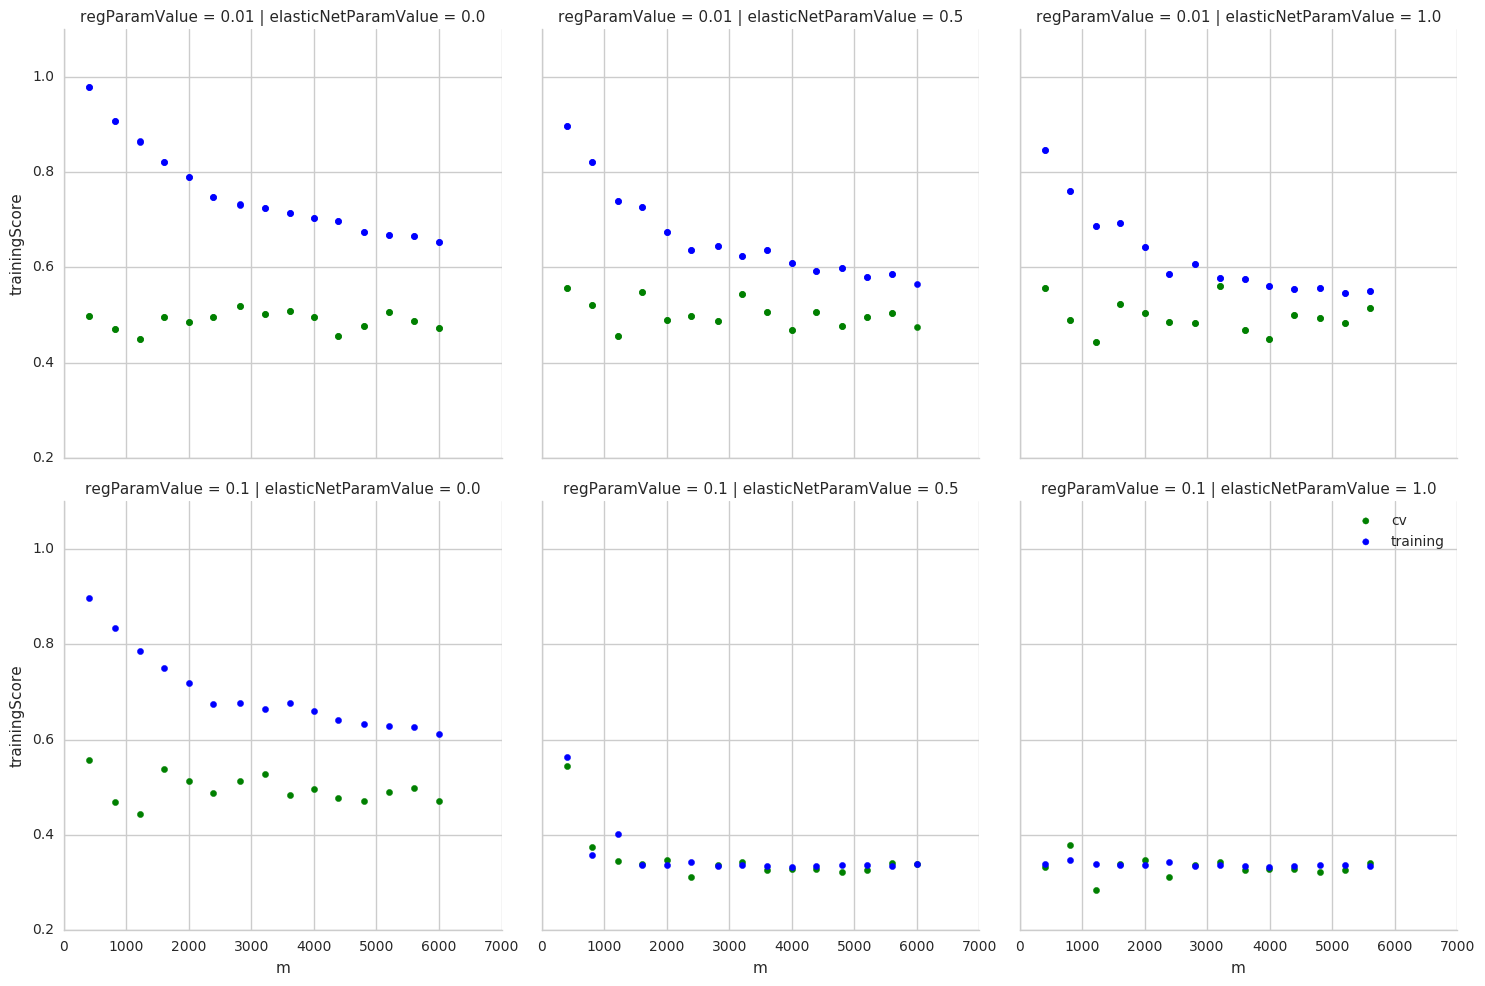

In [96]:

g = sns.FacetGrid(data, col="elasticNetParamValue",  row="regParamValue", size=5)
g = g.map(plt.scatter, "m", "cvScore", color='green', label="cv")
g = g.map(plt.scatter, "m", "trainingScore", color='blue', label="training")
plt.legend()

In [109]:
# Vary Regularization

reg_data = pd.read_csv("data/training-1474847261124", names=data_headers)
reg_data.tail()

,m,trainingScore,cvScore,SGDIterationCnt,x1,elasticNetParamValue,x3,regParamValue
26,8016,0.690165,0.491729,723,elasticNetParam,0.0,regParam,0.000264
27,8016,0.695604,0.494891,891,elasticNetParam,0.0,regParam,0.000176
28,8016,0.702487,0.488180,1058,elasticNetParam,0.0,regParam,0.000117
29,8016,0.704326,0.489470,1147,elasticNetParam,0.0,regParam,0.000078
30,8016,0.706478,0.485157,1439,elasticNetParam,0.0,regParam,0.000052


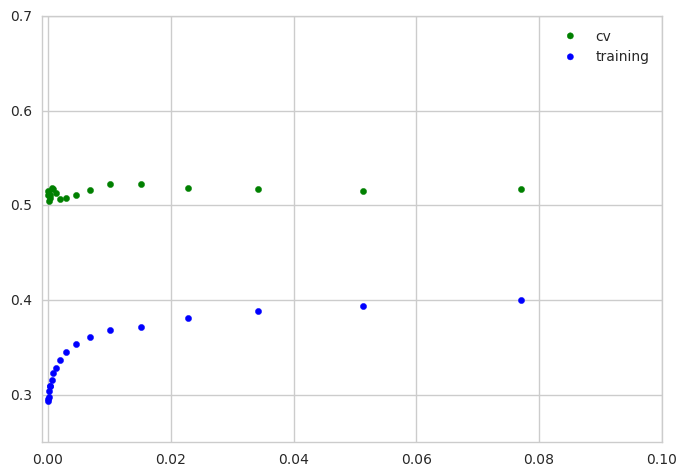

In [119]:
reg_data['trainLoss'] = 1 - reg_data['trainingScore']
reg_data['cvLoss'] = 1 - reg_data['cvScore']

plt.scatter(data=reg_data, x="regParamValue", y="cvLoss", color="green", label="cv")
plt.scatter(data=reg_data, x="regParamValue", y="trainLoss", color="blue", label="training")

plt.xlim([-0.001, 0.1])

plt.legend()
plt.show()

## More Data

The above graphs indicated that more data would help the classification. I spent ~ an hour producing more training examples.

In [4]:
data_headers = [
    'm',
    'trainingScore',
    'cvScore',
    'SGDIterationCnt',
    'x1',
    'elasticNetParamValue',
    'x3',
    'regParamValue',
]

raw_data = pd.read_csv('data/training-1475191899995', names=data_headers)

helpful_cols = [col for col in list(raw_data) if not col.startswith('x')]
data = raw_data[helpful_cols]

data.head()

,m,trainingScore,cvScore,SGDIterationCnt,elasticNetParamValue,regParamValue
0,11639,0.613138,0.611491,22,0.0,10.000000
1,11639,0.622715,0.621980,22,0.0,6.666667
2,11639,0.630178,0.628556,24,0.0,4.444444
3,11639,0.635316,0.637305,24,0.0,2.962963
4,11639,0.641901,0.635904,26,0.0,1.975309


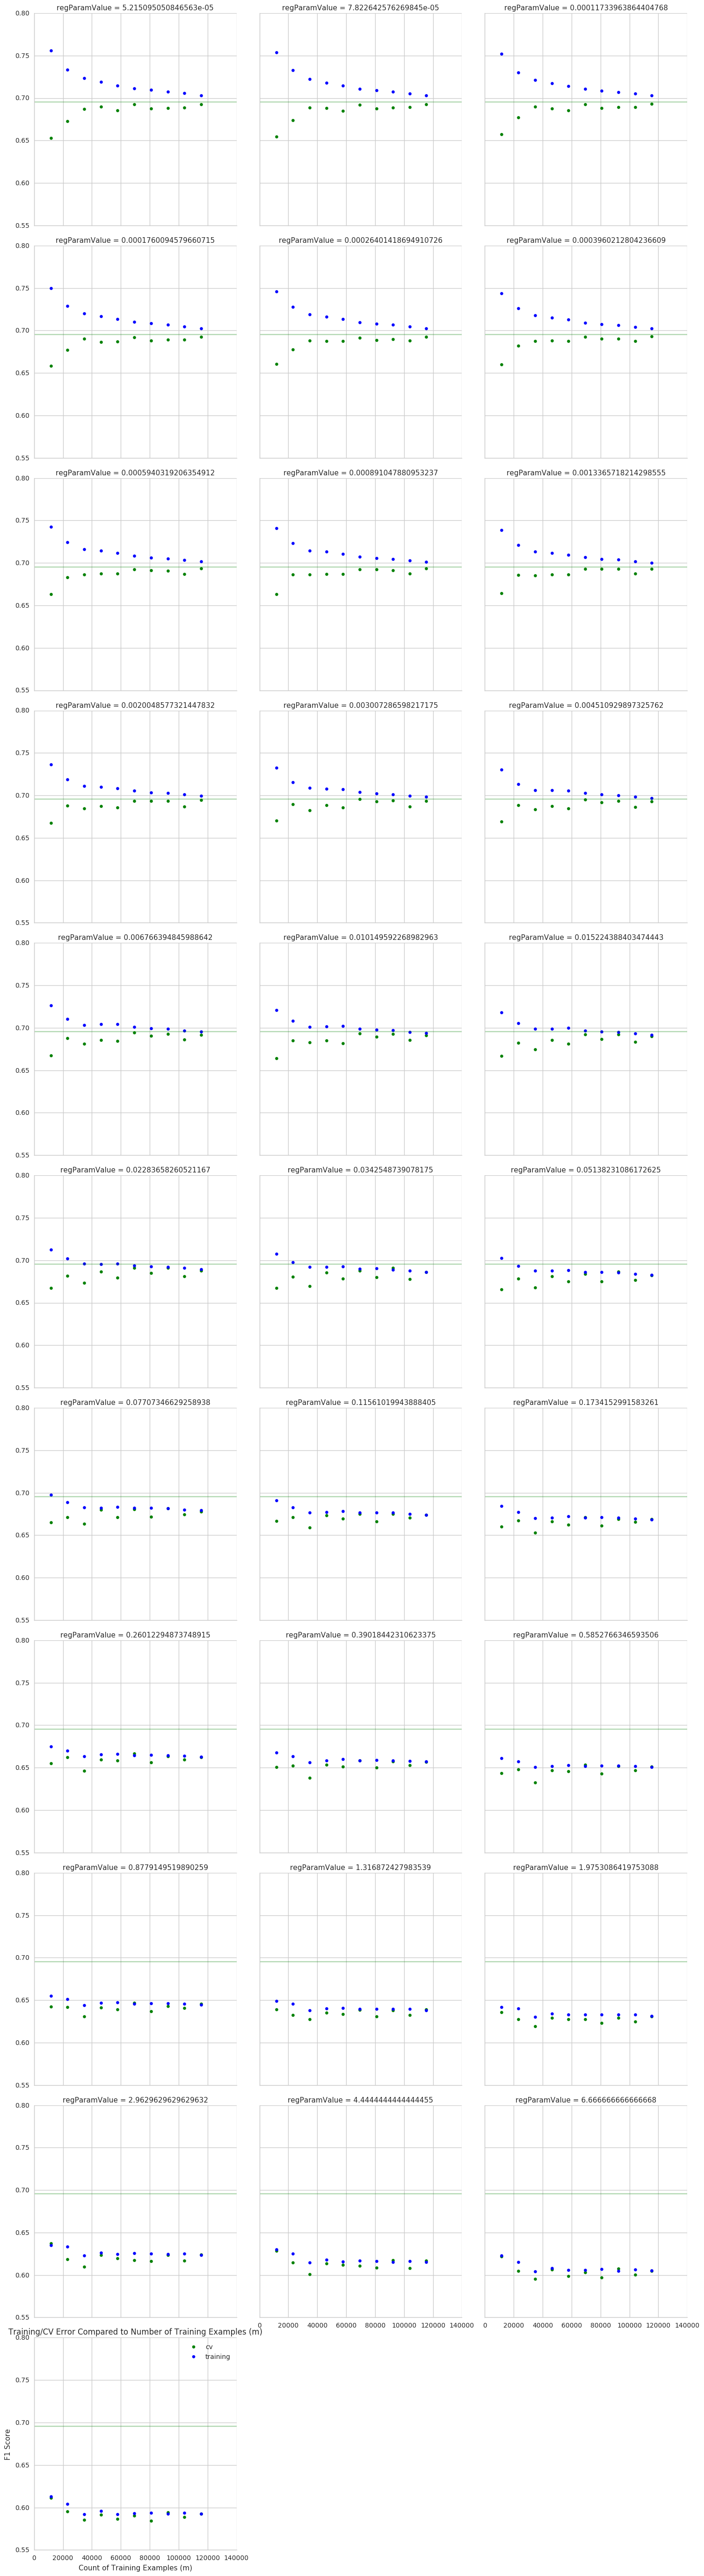

In [30]:
g = sns.FacetGrid(data, col="regParamValue", size=5, col_wrap=3)
g = g.map(plt.scatter, "m", "cvScore", color='green', label="cv")
g = g.map(plt.scatter, "m", "trainingScore", color='blue', label="training")
g = g.map(plt.axhline, y=data['cvScore'].max(), color='g', alpha=0.3)

plt.title("Training/CV Error Compared to Number of Training Examples (m)")
plt.xlabel("Count of Training Examples (m)")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

Looks like a .70 is about the max I can hope to achieve with this model. Also, a regularization parameter <~ 1e-3 seems to be appropriate when training

This model had a maximum of 73668 ad records and 70542 game records.

In [34]:
ad = 73668
game = 70542
total = ad + game

print("ad ratio: %f" % (ad/total))
print("game ratio: %f" % (game/total))
print("max cvScore: %f" % data['cvScore'].max())

ad ratio: 0.510838
game ratio: 0.489162
max cvScore: 0.695421


TODO: play with tuning the threshold to see if that improves the model